**IMPORT  lIBRARY DAN LOAD DATA**

Dataset ini berisi informasi perumahan di pinggiran kota Boston, Massachusetts. Dataset terdiri dari beberapa fitur numerik yang merepresentasikan karakteristik rumah dan lingkungan sekitarnya. Pada analisis ini, kita menggunakan 4 fitur utama:

- RM: Rata-rata jumlah kamar per rumah
- LSTAT: Persentase penduduk berstatus sosial ekonomi rendah
- PTRATIO: Rasio murid terhadap guru
- MEDV: Harga median rumah dalam ribuan dolar

Kita akan membangun model regresi pohon keputusan (decision tree regression) untuk memprediksi `MEDV` berdasarkan masing-masing fitur.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Load dataset
df = pd.read_csv("housing.csv")  # Pastikan file housing.csv ada di folder kerja Jupyter

df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**VISUALISASI DECISON TREE REGRESSION UNTUK 3 FITUR** 

Decision tree regression ini membagi ruang fitur menjadi beberapa segmen dan memprediksi nilai target berdasarkan rata-rata nilai target pada segmen tersebut. Kita membuat dua model decision tree:

- `max_depth=2`: pohon sederhana, generalisasi tinggi
- `max_depth=5`: pohon lebih dalam, cenderung lebih akurat namun rawan overfitting

Model akan dibangun secara terpisah untuk tiap fitur (`RM`, `LSTAT`, dan `PTRATIO`) terhadap target `MEDV`.


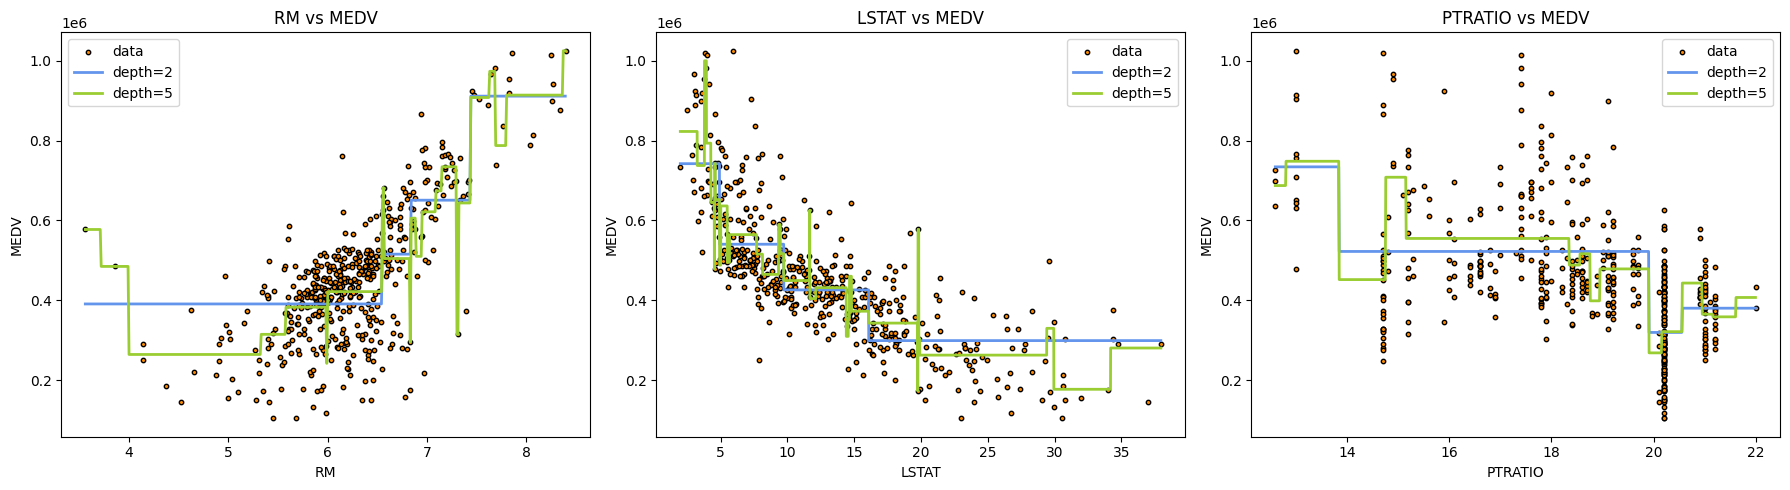

In [9]:
# Pilih fitur yang akan dianalisis
features = ["RM", "LSTAT", "PTRATIO"]
target = "MEDV"

# Buat plot
plt.figure(figsize=(18, 5))

for idx, feature in enumerate(features, 1):
    X = df[[feature]].values
    y = df[target].values

    # Buat model
    regr_1 = DecisionTreeRegressor(max_depth=2)
    regr_2 = DecisionTreeRegressor(max_depth=5)

    # Latih model
    regr_1.fit(X, y)
    regr_2.fit(X, y)

    # Buat data uji
    X_test = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
    y_pred_1 = regr_1.predict(X_test)
    y_pred_2 = regr_2.predict(X_test)

    # Plot
    plt.subplot(1, 3, idx)
    plt.scatter(X, y, s=10, edgecolor="black", c="darkorange", label="data")
    plt.plot(X_test, y_pred_1, color="cornflowerblue", label="depth=2", linewidth=2)
    plt.plot(X_test, y_pred_2, color="yellowgreen", label="depth=5", linewidth=2)
    plt.xlabel(feature)
    plt.ylabel("MEDV")
    plt.title(f"{feature} vs MEDV")
    plt.legend()

plt.tight_layout()
plt.show()


In [10]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("=== Error Metrics on Training Data ===")
for feature in features:
    X = df[[feature]].values
    y_true = df[target].values

    model = DecisionTreeRegressor(max_depth=5)
    model.fit(X, y_true)
    y_pred = model.predict(X)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"Feature: {feature}")
    print(f"  MAE : {mae:.2f}")
    print(f"  MSE : {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}\n")


=== Error Metrics on Training Data ===
Feature: RM
  MAE : 71186.04
  MSE : 9056787386.21
  RMSE: 95167.15

Feature: LSTAT
  MAE : 60899.58
  MSE : 6769731101.20
  RMSE: 82278.38

Feature: PTRATIO
  MAE : 94393.69
  MSE : 15023610149.72
  RMSE: 122570.84

